In [5]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Generate 50 students
student_ids = [f"S{str(i).zfill(3)}" for i in range(1, 51)]
genders = np.random.choice(['Male', 'Female'], size=50)
study_hours = np.round(np.random.uniform(1, 6, size=50), 1)  # Between 1 to 6 hours
attendance = np.random.randint(60, 100, size=50)             # Between 60% and 99%
marks = np.round(study_hours * 10 + (attendance * 0.2) + np.random.normal(0, 5, size=50), 0)

# Assign result based on marks
result = ['Pass' if mark >= 60 else 'Fail' for mark in marks]

# Create the DataFrame
df = pd.DataFrame({
    'Student_ID': student_ids,
    'Gender': genders,
    'Study_Hours': study_hours,
    'Attendance': attendance,
    'Marks': marks,
    'Result': result
})

# Save it for your ETL pipeline
df.to_csv("student_data.csv", index=False)
df.head()


,Student_ID,Gender,Study_Hours,Attendance,Marks,Result
0,S001,Male,4.9,94,64.0,Pass
1,S002,Female,2.0,94,36.0,Fail
2,S003,Male,3.6,92,59.0,Fail
3,S004,Male,4.0,64,54.0,Fail
4,S005,Male,1.2,98,29.0,Fail


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore


In [9]:
df = pd.read_csv("student_data.csv")
df.head()


,Student_ID,Gender,Study_Hours,Attendance,Marks,Result
0,S001,Male,4.9,94,64.0,Pass
1,S002,Female,2.0,94,36.0,Fail
2,S003,Male,3.6,92,59.0,Fail
3,S004,Male,4.0,64,54.0,Fail
4,S005,Male,1.2,98,29.0,Fail


In [11]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
df.describe()


Shape: (50, 6)

Data Types:
 Student_ID      object
Gender          object
Study_Hours    float64
Attendance       int64
Marks          float64
Result          object
dtype: object

Missing Values:
 Student_ID     0
Gender         0
Study_Hours    0
Attendance     0
Marks          0
Result         0
dtype: int64


,Study_Hours,Attendance,Marks
count,50.000000,50.000000,50.000000
mean,3.414000,82.380000,50.440000
std,1.582946,12.527342,15.919645
min,1.000000,60.000000,21.000000
25%,2.000000,72.000000,34.250000
50%,3.550000,85.500000,52.000000
75%,4.900000,94.000000,64.000000
max,5.900000,99.000000,74.000000


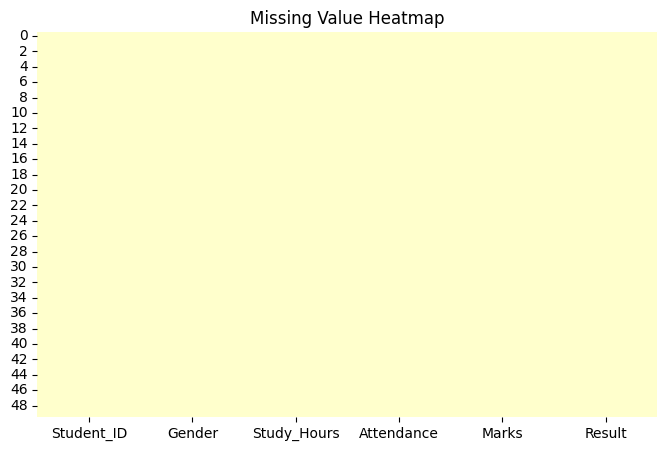

In [13]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cmap='YlOrRd', cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


In [17]:
df.ffill(inplace=True)


In [19]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()


,Student_ID,Gender,Study_Hours,Attendance,Marks,Result
0,0,1,4.9,94,64.0,1
1,1,0,2.0,94,36.0,0
2,2,1,3.6,92,59.0,0
3,3,1,4.0,64,54.0,0
4,4,1,1.2,98,29.0,0


In [21]:
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
df_cleaned = df[(z_scores < 3).all(axis=1)]
print("Removed outliers. New shape:", df_cleaned.shape)


Removed outliers. New shape: (50, 6)


In [23]:
scaler = StandardScaler()
numeric_cols = ['Study_Hours', 'Attendance', 'Marks']
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])
df_cleaned.head()


,Student_ID,Gender,Study_Hours,Attendance,Marks,Result
0,0,1,0.948287,0.936988,0.860425,1
1,1,0,-0.902340,0.936988,-0.916264,0
2,2,1,0.118695,0.775717,0.543159,0
3,3,1,0.373954,-1.482087,0.225893,0
4,4,1,-1.412858,1.259532,-1.360437,0


In [25]:
X = df_cleaned.drop(["Result", "Student_ID"], axis=1)
y = df_cleaned["Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (40, 4)
Testing shape: (10, 4)


In [27]:
df_cleaned.to_csv("processed_student_data.csv", index=False)
print("✅ Final processed dataset saved as 'processed_student_data.csv'")


✅ Final processed dataset saved as 'processed_student_data.csv'


In [31]:
import pandas as pd

df = pd.read_csv("student_data.csv")
df.head()


,Student_ID,Gender,Study_Hours,Attendance,Marks,Result
0,S001,Male,4.9,94,64.0,Pass
1,S002,Female,2.0,94,36.0,Fail
2,S003,Male,3.6,92,59.0,Fail
3,S004,Male,4.0,64,54.0,Fail
4,S005,Male,1.2,98,29.0,Fail


In [33]:
print(df)


   Student_ID  Gender  Study_Hours  Attendance  Marks Result
0        S001    Male          4.9          94   64.0   Pass
1        S002  Female          2.0          94   36.0   Fail
2        S003    Male          3.6          92   59.0   Fail
3        S004    Male          4.0          64   54.0   Fail
4        S005    Male          1.2          98   29.0   Fail
5        S006  Female          4.0          87   60.0   Pass
6        S007    Male          1.9          66   33.0   Fail
7        S008    Male          1.3          68   31.0   Fail
8        S009    Male          5.7          67   67.0   Pass
9        S010  Female          5.8          71   71.0   Pass
10       S011    Male          5.0          93   67.0   Pass
11       S012    Male          2.5          92   36.0   Fail
12       S013    Male          1.5          82   33.0   Fail
13       S014    Male          4.4          83   62.0   Pass
14       S015  Female          3.2          96   51.0   Fail
15       S016    Male   